In [1]:
# Wavelets are fun!
import pywt
from pylab import log2,zeros,linspace,sin,pi,imshow,show,plt

In [2]:
# Setup time variables
fs = 44100
ts = 1.0/fs
L = 1
t = linspace(0,1-ts,int(fs*L))

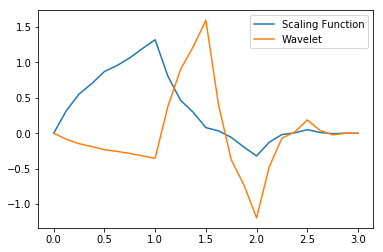

In [3]:
# db2 is from the Haar family. It has interesting properties including Holder continuity (possibly related to fractals)
db2 = pywt.Wavelet("db2")
phi,psi,tx=db2.wavefun(3) # Cascade algorithm to generate scaling function and wavelet
plt.plot(tx,phi)
plt.plot(tx,psi)
plt.legend(['Scaling Function', 'Wavelet'])
plt.show()

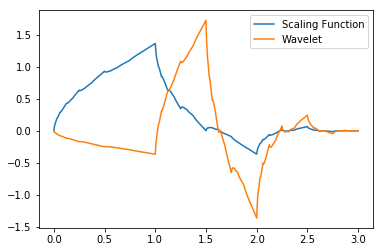

In [4]:
# Using more iterations in the cascade algorithm gives finer detail
# More detail is different than db3, db4...as these come from different polynomials
db2 = pywt.Wavelet("db2")
phi,psi,tx=db2.wavefun(8)
plt.plot(tx,phi)
plt.plot(tx,psi)
plt.legend(['Scaling Function', 'Wavelet'])
plt.show()

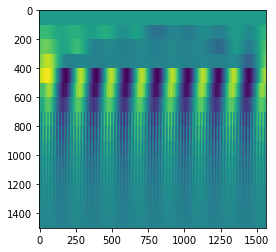

In [5]:
# View a sine wave using the stationary wavelet transform
# Create an image to view the SWT as if it were uniform (square image)
# Note that the 'scale' variable in wavelet transforms is inverse to frequency
def viewSWT(x):
    lp2 = 2**int(log2(len(x)))
    sig = x[0:lp2]
    W = pywt.swt(sig,'db2')
    vert = 100 # Pixels per level
    L = len(W)
    downrate = len(x)/(2**int(log2(L*vert)+1)) # To make it more square
    downrate = int(downrate)
    img = zeros((vert*L,len(W[0][0][::downrate])))

    for k in range(len(W)):
        img[k*vert:(k+1)*vert,:] = W[k][0][::downrate]

    imshow(img)
    show()

x = sin(2*pi*t*10) + sin(2*pi*t*100)
viewSWT(x)

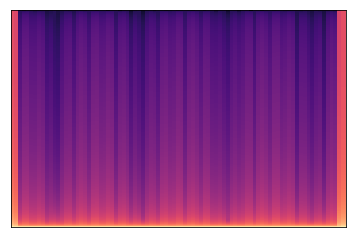

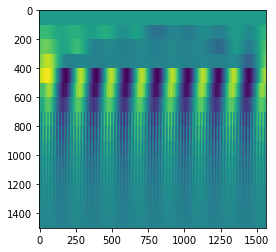

In [6]:
# Compare to STFT
import librosa
from librosa.display import specshow
from numpy import log10,abs
def viewSTFT(x):
    X = librosa.stft(x)
    specshow(20*log10(abs(X)))
    show()

x = sin(2*pi*t*10) + sin(2*pi*t*100)
viewSTFT(x)
plt.figure(2)
viewSWT(x)

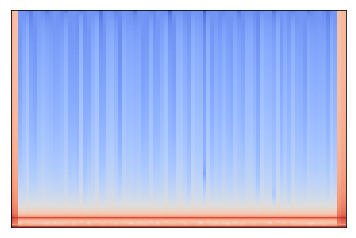

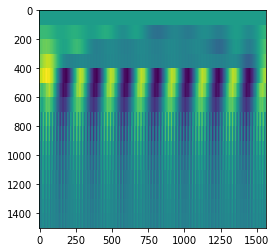

In [7]:
x = sin(2*pi*t*10) + sin(2*pi*t*100) + sin(2*pi*t*1000)
viewSTFT(x)
plt.figure(2)
viewSWT(x)

In [8]:
# Now let's go back to the db2 wavelet and construct audio from the wavelet
import IPython.display as ipd
x = sin(2*pi*t*228.5)
ipd.Audio(x, rate=fs) # Play a sine wave

In [9]:
# The number of iterations in the cascade algorithm effects the length of the vector
phi,psi,tx = db2.wavefun(6)
# The wavelet psi can be used as a single period, then copy paste to get a sound
x = list(psi)*int(fs/len(psi))
ipd.Audio(x, rate=fs)

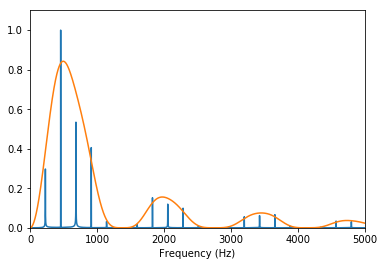

In [10]:
# Let's look at the spectrum of the synthesized sound
from pylab import fft
X = fft(x,fs)
plt.plot(abs(X/max(abs(X))))
plt.plot(abs(fft(psi/len(psi)*3,fs)))
plt.axis([0,5000,0,1.1])
plt.xlabel("Frequency (Hz)")
show()

In [11]:
# The fundamental frequency is determined by the length of psi
# The frequencies present in the synthesized signal are formed from the spectral envelope